# Introduction

The Global Health Observatory (GHO) is a program established by the World Health Organization (WHO) to monitor public health data in order to inform health policy. The observatory tracks statistics and information from around the world and organizes the data by country, disease, or topic. 

One topic of interest is life expectancy, which is a key metric for assessing population health. Due to several factors, including significant advances in medicine, the global average life expectancy has more than doubled since 1900, though there still remain wide discrepancies in averages across countries and even among different social/economic groups within the same country [[1]]. 

[1]: https://ourworldindata.org/life-expectancy#:~:text=The%20United%20Nations%20estimate%20a,life%20expectancy%20of%2072.3%20years

The purpose of this project is to use a dataset from the GHO in order to explore the relationship of life expectancy with a number of other features, including immunization rates, mortality rates, economic factors, social factors, other health-related factors. 

We test the efficacy of several different techniques from machine learning in optimizing predictive models based on the features of this dataset. 

# Examining the dataset

In [2]:
import pandas as pd

df = pd.read_csv('life_expectancy.csv')

In [3]:
print(df.head())

       Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0      1154   19.1  ...   
1               73.523582         62.0       492   18.6  ...   
2               73.219243         64.0       430   18.1  ...   
3               78.184215         67.0      2787   17.6  ...   
4                7.097109         68.0      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1       

In [4]:
print(df.describe())

              Year  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2938.000000    2938.000000  2938.000000   
mean   2007.518720       164.725664      30.303948     4.546875   
std       4.613841       124.086215     117.926501     3.921946   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        74.000000       0.000000     1.092500   
50%    2008.000000       144.000000       3.000000     3.755000   
75%    2012.000000       227.000000      22.000000     7.390000   
max    2015.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2938.000000  2938.000000    2938.000000  2938.000000   
mean               738.251295    83.022124    2419.592240    38.381178   
std               1987.914858    22.996984   11467.272489    19.935375   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

There are 20 features in total. Most are numerical, but there are 2 categorical features, namely, "Country" and "Status". 

Because we are concerned with global trends in our models--and not about differences between countries--we are going to drop the "Country" column, leaving us with just one categorical feature "Status".

In [6]:
df = df.drop(['Country'], axis=1)

Next we split the data into labels and features. The labels (`y`) are the last column, namely, "Life Expectancy," and the remaining columns are the features (`X`). To be even more precise, we isolate the numerical features by the variable name `X_num`.

In [7]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]
X_num = X_num = X.drop(['Status'], axis=1)

# Distributions

To better visualize our data, let's plot the distribution of each numerical feature. 

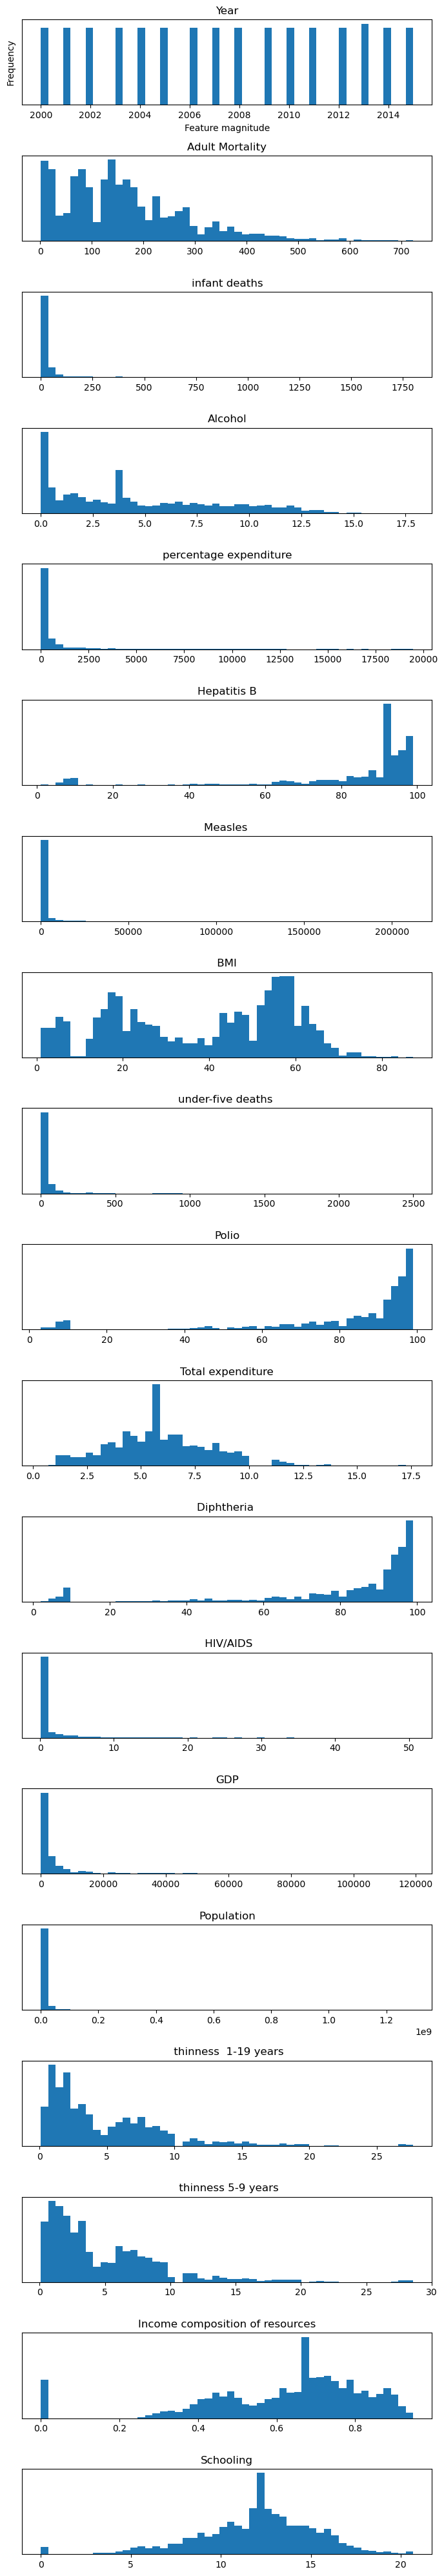

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(19, 1, figsize=(7, 40))
ax = axes.ravel()

for i in range(19):
    ax[i].hist(X_num.iloc[:, i], bins=50)
    ax[i].set_title(X_num.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
fig.tight_layout()

Let's also plot the distribution of the target. 

Text(0, 0.5, 'Frequency')

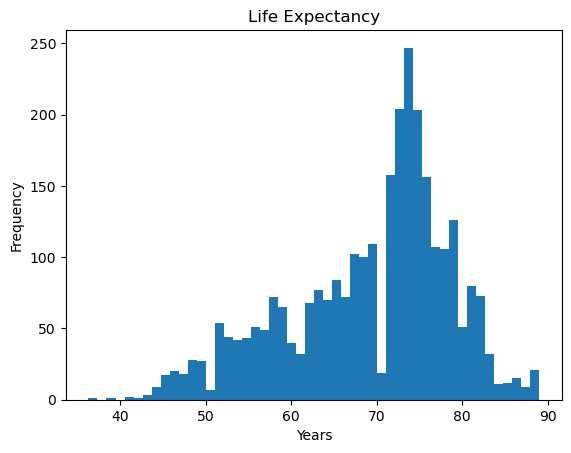

In [9]:
plt.hist(y, bins=50)
plt.title("Life Expectancy")
plt.xlabel("Years")
plt.ylabel("Frequency")

# Dealing with categorical variables

Because one of the features ("Status") is categorical, use use one-hot encoding to convert the feature into a numerical type. 

In [10]:
X = pd.get_dummies(X)

In [11]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2938 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2938 non-null   float64
 10  Total expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12   HIV/AIDS           

# Splitting the data

To begin, we split the data into two different subsets: training and testing. We'll use the training data to develop families of models (and use cross validation to pick the best among the family), and we'll use the test data to evaluate the efficacy of our (best) models. 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Size of training set: {}      Size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 2203      Size of test set: 735


# Linear Models

To start, let's investigate the efficacy of one of the simplest class of models: linear models.   

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate the model 
linreg = LinearRegression()

# gather the scores from cross-validation
scores = cross_val_score(linreg, X_train, y_train, cv=5)

# print the scores
print("Cross-validation scores: {}".format(scores))

# print the average
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.80802996 0.83455512 0.78330884 0.80343412 0.82874984]
Average cross-validation score: 0.8116155782378144


To get a better sense for how this type of model is working, let's fit a model to our training data and visualize the model's coefficients. 

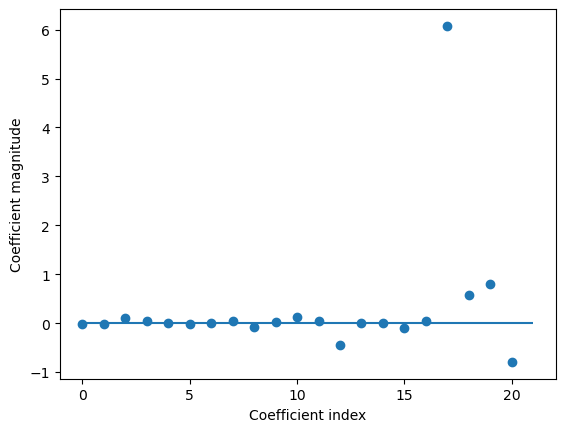

In [14]:
linreg = LinearRegression().fit(X_train, y_train)
plt.plot(linreg.coef_, 'o')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(linreg.coef_))

As we can see from the plot of the coefficients, the 17th one, namely, "Income composition of resources" has a magnitude much higher than any of the others. Moreover, most of the coefficients are very close to zero, which means that they hardly contribute to the model at all. 

# Lasso

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# instantiate the model 
lasso = Lasso(max_iter=100000, tol=1e-2)

# create a parameter grid
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# create a grid search based on the parameter grid
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# fit the grid search
grid_search.fit(X_train, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'alpha': 0.001}
Best cross-validation score: 0.81


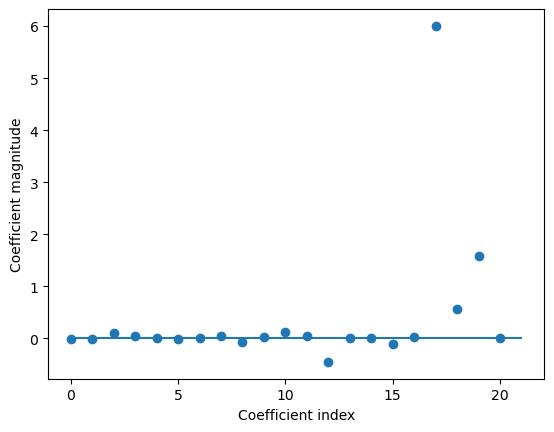

In [16]:
lasso = Lasso(max_iter=100000, tol=1e-2, alpha=0.001)
lasso.fit(X_train, y_train)
plt.plot(lasso.coef_, 'o')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lasso.coef_))

# Ridge

In [17]:
from sklearn.linear_model import Ridge

# instantiate the model 
ridge = Ridge()

# create a parameter grid
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# create a grid search based on the parameter grid
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# fit the grid search
grid_search.fit(X_train, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.56518e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.73344e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.00939e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.70805e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Use

Best parameter: {'alpha': 1}
Best cross-validation score: 0.81


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.87536e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.87536e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


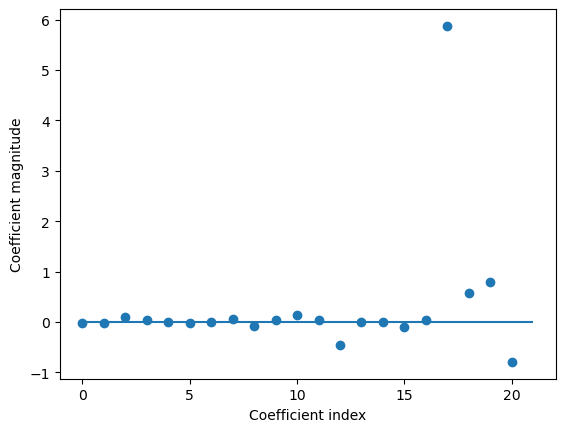

In [18]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
plt.plot(ridge.coef_, 'o')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(ridge.coef_))

# Effect of scaling on linear models

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X.columns.values

In [27]:
print(X_train_scaled.describe())

               Year  Adult Mortality  infant deaths       Alcohol  \
count  2.203000e+03     2.203000e+03   2.203000e+03  2.203000e+03   
mean   9.790423e-15    -2.890208e-17  -1.281317e-17  5.341972e-18   
std    1.000227e+00     1.000227e+00   1.000227e+00  1.000227e+00   
min   -1.636061e+00    -1.327092e+00  -2.494314e-01 -1.154355e+00   
25%   -7.648395e-01    -7.236457e-01  -2.494314e-01 -8.992919e-01   
50%    1.063815e-01    -1.765214e-01  -2.244663e-01 -1.943433e-01   
75%    7.597973e-01     4.912921e-01  -7.467605e-02  7.349071e-01   
max    1.631018e+00     4.482081e+00   1.472960e+01  3.198382e+00   

       percentage expenditure   Hepatitis B      Measles           BMI   \
count            2.203000e+03  2.203000e+03  2.203000e+03  2.203000e+03   
mean            -4.815334e-17 -8.365730e-17 -1.314075e-16  6.118070e-17   
std              1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min             -3.719607e-01 -3.440115e+00 -2.123063e-01 -1.891874e+00   
25%

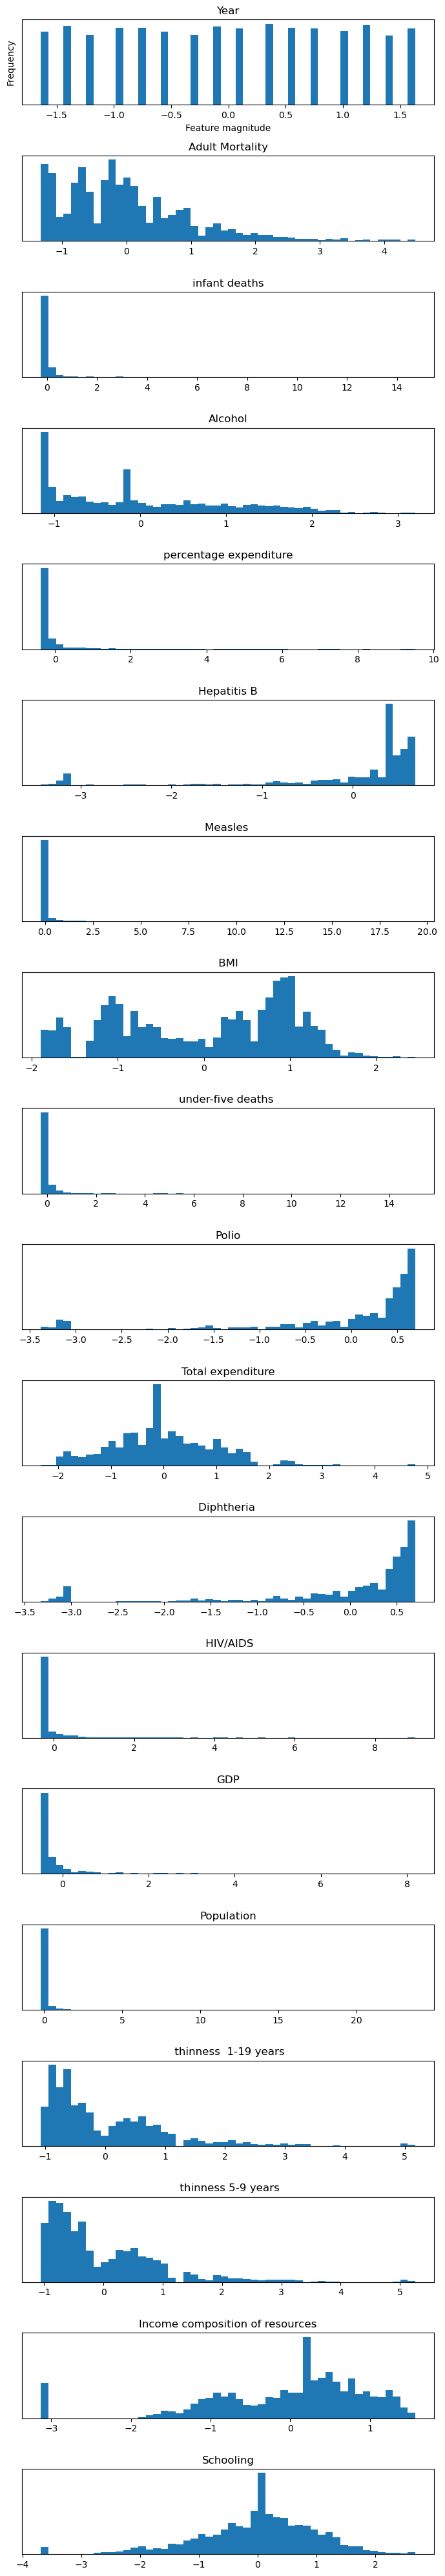

In [28]:
fig, axes = plt.subplots(19, 1, figsize=(7, 40))
ax = axes.ravel()

for i in range(19):
    ax[i].hist(X_train_scaled.iloc[:, i], bins=50)
    ax[i].set_title(X_train_scaled.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
fig.tight_layout()

In [29]:
# cross-validation average of linear model
linreg = LinearRegression()
print("Cross-validation score for linear model: {}".format(cross_val_score(linreg, X_train_scaled, y_train, cv=5).mean()))


Cross-validation score for linear model: 0.811615578238077


In [30]:
# best parameter and score for lasso 
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
lasso = Lasso(max_iter=100000, tol=1e-2)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'alpha': 0.001}
Best cross-validation score: 0.81


In [31]:
# best parameter and score for ridge 
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'alpha': 0.1}
Best cross-validation score: 0.81


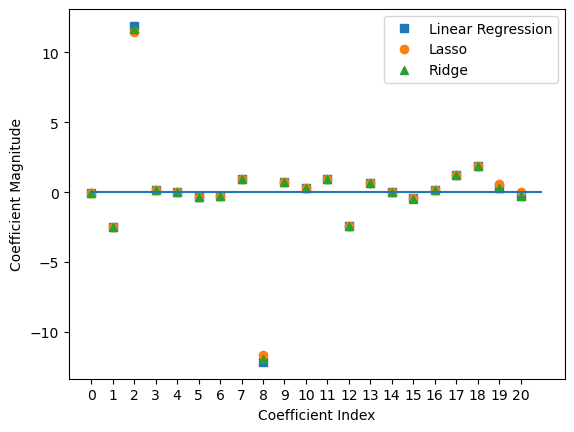

In [32]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
lasso = Lasso(max_iter=100000, tol=1e-2, alpha=0.001).fit(X_train_scaled, y_train)
ridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train)

plt.plot(linreg.coef_, 's', label="Linear Regression")
plt.plot(lasso.coef_, 'o', label="Lasso")
plt.plot(ridge.coef_, '^', label="Ridge")
plt.xlabel("Coefficient Index")
plt.xticks(range(21))
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(ridge.coef_))
plt.legend()

In [33]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("Test score of scaled linear regression: {:.2f}".format(linreg.score(X_test_scaled, y_test)))

Test score of scaled linear regression: 0.83


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Principal component analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

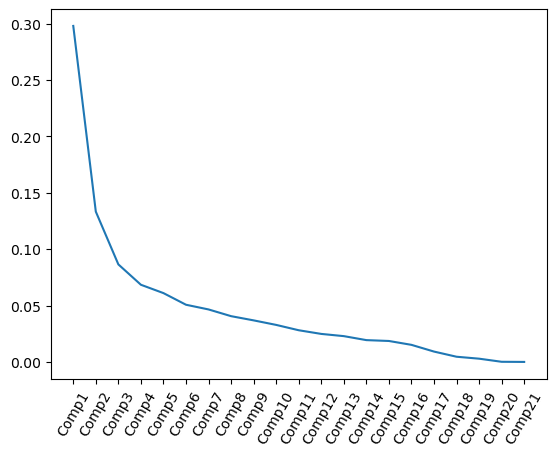

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 21)
pca.fit(X_train_scaled)
var_ratio = pca.explained_variance_ratio_
var_ratio= pd.DataFrame(var_ratio)
var_ratio.index = ['Comp' + str(i) for i in range(1,22)]
var_ratio.columns = ['Proportion of Variance']

plt.plot(var_ratio)
plt.xticks(rotation=60)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
components = pca.fit(X_train_scaled).components_
components = pd.DataFrame(components)
components.index = ['Comp1', 'Comp2', 'Comp3', 'Comp4']
components.columns =  X_train_scaled.columns
print(components)

           Year  Adult Mortality  infant deaths   Alcohol  \
Comp1 -0.064559         0.211363       0.187342 -0.243842   
Comp2  0.005528        -0.128150       0.478314  0.143264   
Comp3 -0.208052         0.229208      -0.093039  0.187752   
Comp4 -0.180579         0.315722      -0.057385  0.125906   

       percentage expenditure  Hepatitis B  Measles       BMI   \
Comp1               -0.223287    -0.110942  0.125229 -0.257682   
Comp2                0.205198    -0.066017  0.314227 -0.009626   
Comp3                0.232908    -0.358543 -0.007151 -0.086061   
Comp4                0.146342     0.396302 -0.051225 -0.260537   

       under-five deaths      Polio  ...  Diphtheria    HIV/AIDS       GDP  \
Comp1            0.191939 -0.196116  ...    -0.197125   0.123885 -0.235783   
Comp2            0.475822 -0.003603  ...    -0.008521  -0.072441  0.198508   
Comp3           -0.077995 -0.423789  ...    -0.451647   0.273173  0.170063   
Comp4           -0.054461  0.282358  ...     0.3106

Text(0, 0.5, 'Principal Components')

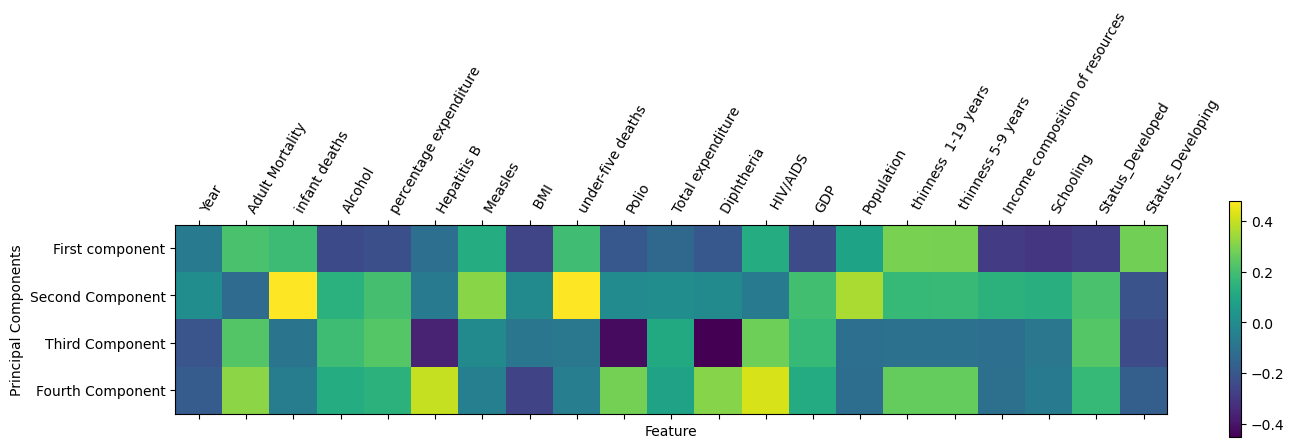

In [37]:
plt.matshow(components, cmap='viridis')
plt.yticks([0,1,2,3], ["First component", "Second Component", "Third Component", "Fourth Component"])
plt.colorbar()
plt.xticks(range(len(X_train_scaled.iloc[0, :])), X_train_scaled.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

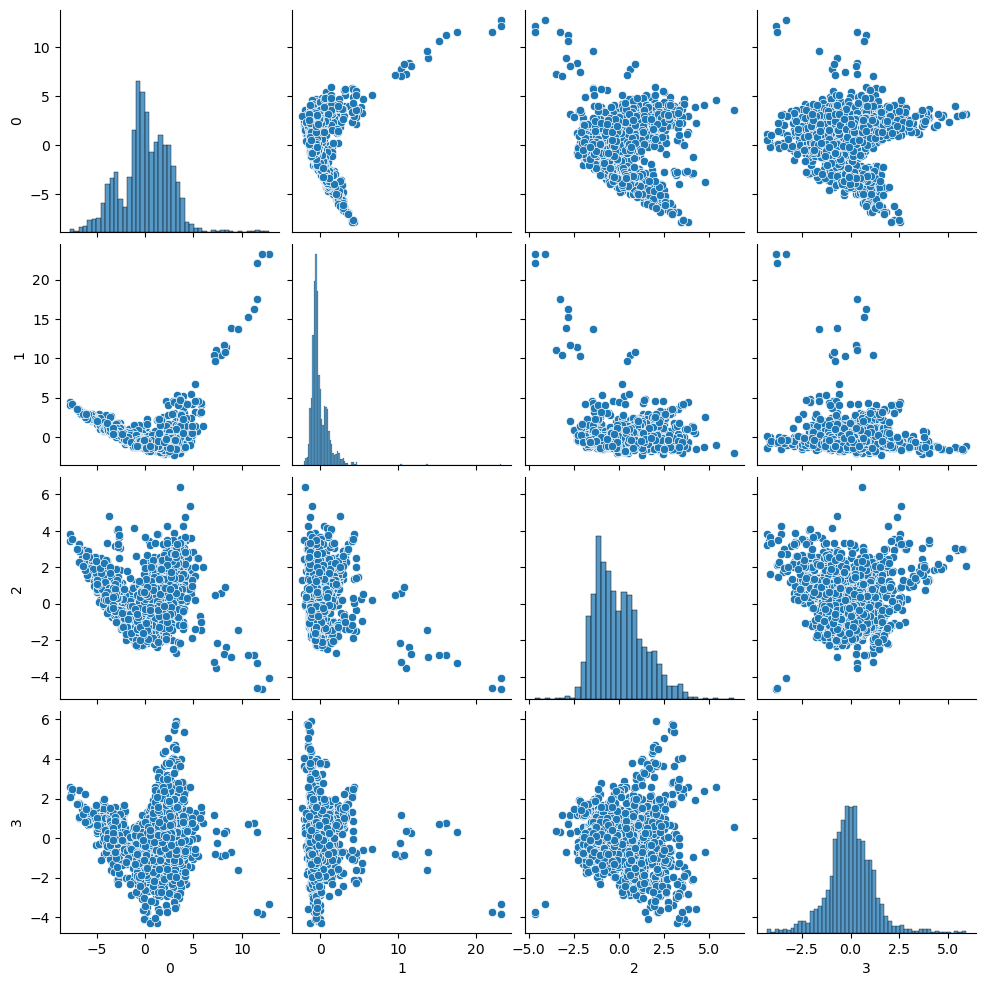

In [38]:
import seaborn as sns

X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(X_train_pca)
sns.pairplot(X_train_pca)

In [39]:
linreg = LinearRegression()
print("Cross-validation score for linear model with PCA: {}".format(cross_val_score(linreg, X_train_pca, y_train, cv=5).mean()))


Cross-validation score for linear model with PCA: 0.7577949139584075


# Support vector regression (SVR): kernel = 'linear'

In [41]:
from sklearn.svm import SVR

# make the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}

# instantiate the linear SVR
svrlin = SVR(kernel='linear')

# make the grid search
grid_search = GridSearchCV(svrlin, param_grid, cv=5)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameter: {'C': 100, 'epsilon': 1}
Best cross-validation score: 0.81


In [55]:
#redo the search because best C is at the edge of the grid

# make the second parameter grid
param_grid2 = {'C': [100, 1000]}

# instantiate the linear SVR
svrlin = SVR(kernel='linear', epsilon=1, max_iter=1e6) #set max_iter to ensure program ends

# make the grid search
grid_search = GridSearchCV(svrlin, param_grid2)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/mitchellfaulk/opt/anacond

Best parameter: {'C': 100}
Best cross-validation score: 0.81


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [45]:
svrlin = SVR(kernel='linear', C=100, epsilon=1)
svrlin.fit(X_train_scaled, y_train)
print("Test score of scaled linear SVR: {:.2f}".format(svrlin.score(X_test_scaled, y_test)))

Test score of scaled linear SVR: 0.82


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# SVR: kernel = 'poly'

In [46]:
# instantiate the polynomial SVR
svrpoly = SVR(kernel='poly')

# make the grid search
grid_search = GridSearchCV(svrpoly, param_grid, cv=5)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'C': 10, 'epsilon': 1}
Best cross-validation score: 0.74


In [47]:
svrpoly = SVR(kernel='poly', C=10, epsilon=1)
svrpoly.fit(X_train_scaled, y_train)
print("Test score of scaled polynomial SVR: {:.2f}".format(svrpoly.score(X_test_scaled, y_test)))

Test score of scaled polynomial SVR: 0.64


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# SVR: kernel = 'rbf'

In [48]:
# instantiate the rbf SVR
svrrbf = SVR(kernel='rbf')

# make the grid search
grid_search = GridSearchCV(svrrbf, param_grid, cv=5)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'C': 100, 'epsilon': 0.01}
Best cross-validation score: 0.93


In [57]:
# redo the search around these best parameters because best C is at the edge

param_grid2 = {'C': [100, 1000]}

svrrbf = SVR(kernel='rbf', epsilon=0.01)

# make the grid search
grid_search = GridSearchCV(svrrbf, param_grid2, cv=5)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'C': 100}
Best cross-validation score: 0.93


In [59]:
svrrbf = SVR(kernel='rbf', C=100, epsilon=0.01)
svrrbf.fit(X_train_scaled, y_train)
print("Test score of scaled rbf SVR: {:.2f}".format(svrrbf.score(X_test_scaled, y_test)))

Test score of scaled rbf SVR: 0.93


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# LassoLars

In [60]:
from sklearn import linear_model

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lassolars = linear_model.LassoLars()
grid_search = GridSearchCV(lassolars, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.131e-02, with an active set 

Best parameter: {'alpha': 0.01}
Best cross-validation score: 0.79


In [61]:
# redo the search because best alpha is at the edge of the grid

param_grid2 = {'alpha': [0.00001, 0.0001, 0.001, 0.01]}
lassolars = linear_model.LassoLars()
grid_search = GridSearchCV(lassolars, param_grid2, cv=5)
grid_search.fit(X_train_scaled, y_train)

# print best parameter/score
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'alpha': 0.0001}
Best cross-validation score: 0.81


/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/mitchellfaulk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.131e-02, with an active set 